# Project 2
## Analyzing Domestic Violence and Social Service Utilization Across NYC Boroughs

### **Introduction**

- This project examines the relationship between domestic violence incidents and social service utilization across New York City boroughs.

- The domestic violence (DV) dataset is sourced from the **NYC Mayor’s Office to End Domestic and Gender-Based Violence (ENDGBV)**. It provides incident-level information such as borough, victim and suspect demographics, offense type, and precinct.

**Source:**  
*NYC ENDGBV — The Intersection of Domestic Violence, Race/Ethnicity, and NYC Borough Data*  
https://data.cityofnewyork.us/Public-Safety/ENDGBV-The-Intersection-of-Domestic-Violence-Race-/ge9t-ywzs/about_data

- The second dataset comes from the **NYC Borough/Community District Report**, which includes monthly borough-level counts of individuals receiving social services such as the Supplemental Nutrition Assistance Program (SNAP), Cash Assistance (CA), and Medicaid (MA).  
For this analysis, SNAP recipients are used as an indicator of economic need at the borough level.

**Source:**  
*NYC Borough/Community District Report — Social Services*  
https://data.cityofnewyork.us/Social-Services/Borough-Community-District-Report/5awp-wfkt/about_data

### **Research Question**

Do boroughs with higher social service utilization (as measured by SNAP recipients) also experience higher levels of reported domestic violence?


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [64]:
# Load the data
ENDGBV = pd.read_csv(
    "ENDGBV__The_Intersection_of_Domestic_Violence,_Race_Ethnicity_and_Sex.csv",
    low_memory=False
)
Report = pd.read_csv("Borough_Community_District_Report.csv")

In [65]:
# Inspect columns
print(ENDGBV.columns)
print(Report.columns)

Index(['Offense Type', 'Report Date', 'Incident Precinct Code', 'Borough Name',
       'Intimate Relationship Flag', 'Victim Race', 'Victim Sex',
       'Victim Reported Age', 'Suspect Race', 'Suspect Sex',
       'Suspect Reported Age', 'COMMDIST', 'Poverty', 'Median Income',
       'Unemployment'],
      dtype='object')
Index(['Month', 'Borough', 'Community District (CD)',
       'Borough Consultation Total SNAP Recipients',
       'Borough Consultation Total SNAP Households',
       'Borough Consultation Total Cash Assistance Recipients',
       'Borough Consultation Total Cash Assistance Cases',
       'Borough Consultation Total Medicaid Only Enrollees',
       'Borough Consultation Total Medicaid Enrollees'],
      dtype='object')


In [66]:
# Dataset 1: DV Incidents per Borough
dv_borough = ENDGBV.groupby("Borough Name").size().reset_index(name="DV_Incidents")
dv_borough

,Borough Name,DV_Incidents
0,BRONX,144222
1,BROOKLYN,141199
2,MANHATTAN,72104
3,QUEENS,102030
4,STATEN ISLAND,24235


In [67]:
# Dataset 2: SNAP recipients per borough
Report["Borough Consultation Total SNAP Recipients"] = (
    pd.to_numeric(
        Report["Borough Consultation Total SNAP Recipients"]
        .astype(str)
        .str.replace(",", ""),  # remove commas
        errors="coerce"         # convert invalid strings to NaN
    )
)
snap_borough = (
    Report.groupby("Borough")["Borough Consultation Total SNAP Recipients"]
    .mean()
    .reset_index(name="Avg_SNAP_Recipients")
)
snap_borough


,Borough,Avg_SNAP_Recipients
0,Bronx,39343.732759
1,Brooklyn,32860.634100
2,Manhattan,19422.362069
3,Queens,22972.534483
4,Staten_Island,22644.862069


In [68]:
print(ENDGBV["Borough Name"].unique())
print(Report["Borough"].unique())

['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten_Island']


In [69]:
# Standardize both datasets
Report["Borough"] = (
    Report["Borough"]
    .str.replace("_", " ")   # convert Staten_Island → Staten Island
    .str.upper()             # BRONX, BROOKLYN, etc.
    .str.strip()
)

ENDGBV["Borough Name"] = (
    ENDGBV["Borough Name"]
    .str.upper()
    .str.strip()
)

In [70]:
snap_borough = (
    Report.groupby("Borough")["Borough Consultation Total SNAP Recipients"]
    .mean()
    .reset_index(name="Avg_SNAP_Recipients")
)

In [71]:
# Merge two datasets
merged = dv_borough.merge(
    snap_borough, 
    left_on="Borough Name",
    right_on="Borough",
    how="inner"
)

# Remove redundant column
merged = merged.drop(columns=["Borough"])
merged

,Borough Name,DV_Incidents,Avg_SNAP_Recipients
0,BRONX,144222,39343.732759
1,BROOKLYN,141199,32860.634100
2,MANHATTAN,72104,19422.362069
3,QUEENS,102030,22972.534483
4,STATEN ISLAND,24235,22644.862069


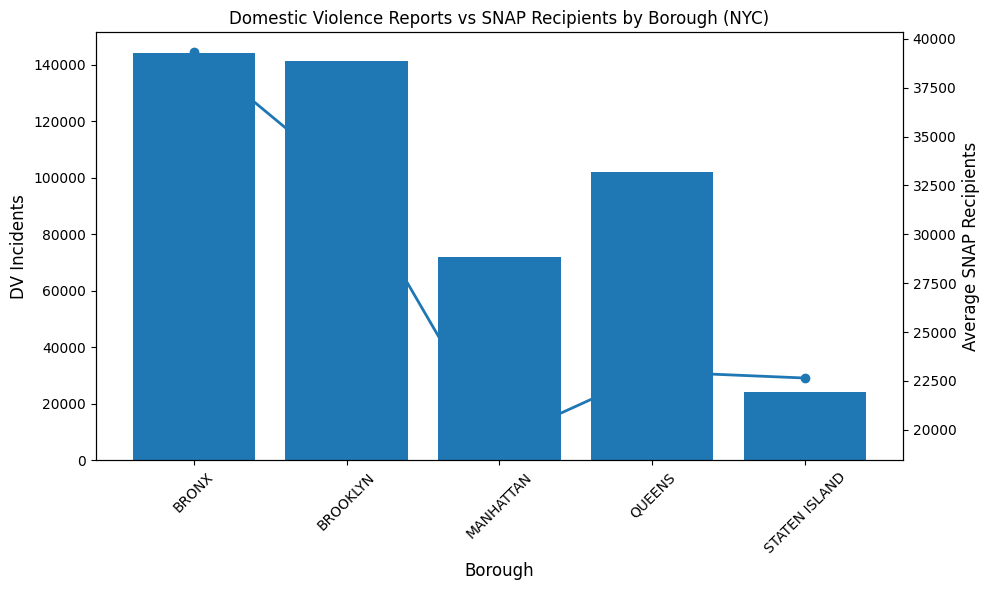

In [72]:
# Visualization 1
# First axis — DV incidents
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.bar(merged["Borough Name"], merged["DV_Incidents"])
ax1.set_ylabel("DV Incidents", fontsize=12)
ax1.set_xlabel("Borough", fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Second axis — SNAP recipients
ax2 = ax1.twinx()
ax2.plot(
    merged["Borough Name"],
    merged["Avg_SNAP_Recipients"],
    marker="o",
    linewidth=2
)
ax2.set_ylabel("Average SNAP Recipients", fontsize=12)

plt.title("Domestic Violence Reports vs SNAP Recipients by Borough (NYC)")
plt.tight_layout()
plt.show()

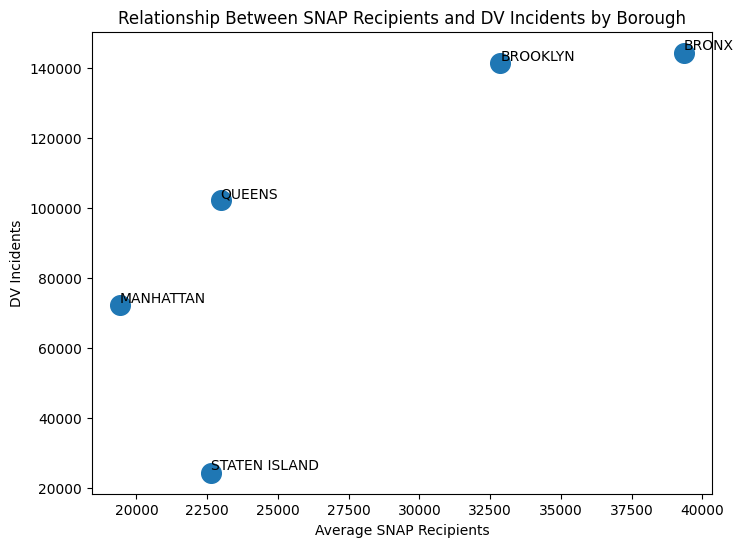

In [63]:
# Visualization 2: Scattor Plot
plt.figure(figsize=(8,6))

plt.scatter(
    merged["Avg_SNAP_Recipients"],
    merged["DV_Incidents"],
    s=200
)

# Label each borough on the plot
for i, row in merged.iterrows():
    plt.text(
        row["Avg_SNAP_Recipients"],
        row["DV_Incidents"],
        row["Borough Name"],
        fontsize=10,
        ha='left',
        va='bottom'
    )

plt.title("Relationship Between SNAP Recipients and DV Incidents by Borough")
plt.xlabel("Average SNAP Recipients")
plt.ylabel("DV Incidents")

plt.show()

### **Takeaways**

Based on the merged dataset, several clear patterns emerge across New York City boroughs:

1. **Domestic Violence (DV) incidents and SNAP utilization follow similar borough-level patterns.**  
   - The Bronx reports both the highest number of DV incidents (144,222) and the highest average SNAP recipient count (~39,344).  
   - Brooklyn follows closely in both DV incidents (141,199) and SNAP utilization (~32,861).  
   - Staten Island reports the lowest DV incidents (24,235) and one of the lowest SNAP averages (~22,645).

2. **Boroughs with higher economic need tend to report higher DV incident counts.**  
   - In the scatter plot, boroughs with larger SNAP recipient populations generally correspond to higher DV totals.  
   - While this does not establish causation, it suggests that social and economic vulnerability may be associated with increased reported DV cases.

3. **Manhattan and Queens fall in the mid-range.**  
   - Manhattan shows relatively low DV incidents (72,104) compared to its economic profile, with SNAP usage (~19,422) lower than all boroughs except Staten Island.  
   - Queens has moderate DV incidents (102,030) and moderate SNAP utilization (~22,973), fitting the overall trend.

### **Overall Insight**
The comparison indicates a **positive relationship between economic hardship (measured by SNAP usage) and domestic violence reports** at the borough level.  
This suggests that supporting communities facing higher economic stress may play a crucial role in reducing DV vulnerability, although further research would be needed to explore underlying factors and causality.
